In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import torch
import matplotlib.pyplot as plt
from input_noise_dataset import NoiseDataset
import torchvision
from pytorch_pretrained_biggan import BigGAN
from os import listdir, path
import gc
import string
import random

In [44]:
device = torch.device("cpu")

In [45]:
dataset = NoiseDataset()

In [46]:
biggan = BigGAN.from_pretrained('biggan-deep-512').to(device)
inputTransformer = torch.load("trained_models/input_transformer.pkl").to(device)
discriminator = torch.load("trained_models/abstract_image_discriminator.pkl").to(device)
feedbackPredictor = torch.load("trained_models/feedback_predictor.pkl").to(device)
torch.cuda.empty_cache()

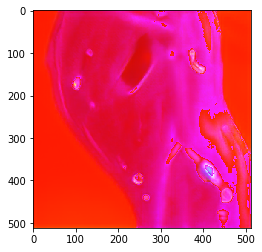

Abstractness: 1.00
Feedback: 4.82



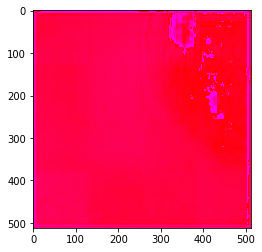

Abstractness: 1.00
Feedback: 4.68



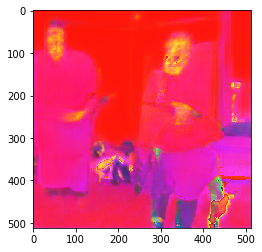

Abstractness: 1.00
Feedback: 4.76



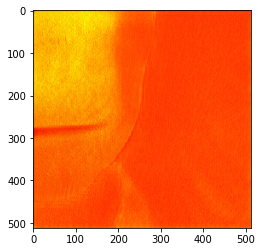

Abstractness: 1.00
Feedback: 4.42



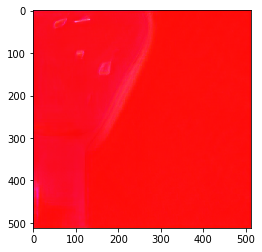

Abstractness: 1.00
Feedback: 4.58



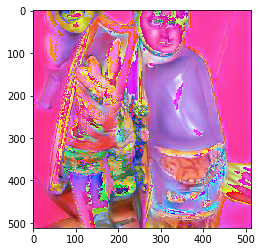

Abstractness: 1.00
Feedback: 4.67



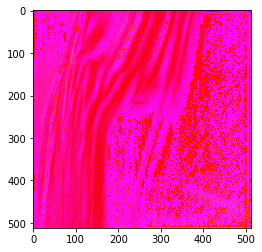

Abstractness: 1.00
Feedback: 4.74



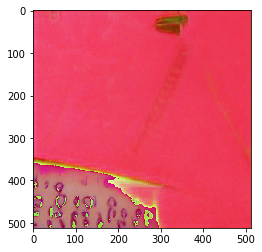

Abstractness: 1.00
Feedback: 4.55



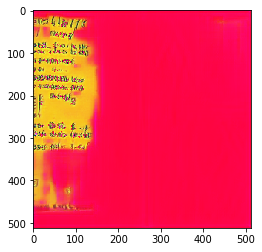

Abstractness: 1.00
Feedback: 4.61



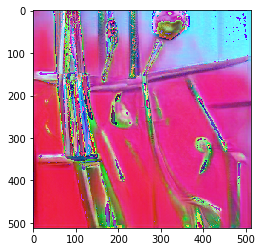

Abstractness: 1.00
Feedback: 4.18



In [61]:
numberOfImagesToGenerate = 10
generatedImagesDir = "image_data/generated"
letters = string.ascii_letters

for i in range(numberOfImagesToGenerate):
    initialInput = dataset[0][0].to(device)
    transformedInput = inputTransformer(initialInput)
    generatedImage = biggan(transformedInput[0], transformedInput[1], 0.99)
    isAbstract = discriminator(generatedImage).item()
    feedback = feedbackPredictor(generatedImage).item()
    pilImage = torchvision.transforms.ToPILImage()(torch.squeeze(generatedImage, dim=0))
    randomString = ''.join(random.choice(letters) for i in range(30))
    pilImage.save(path.join(generatedImagesDir, "generated_image_{}.jpg".format(randomString))) 
    del generatedImage
    gc.collect()
    torch.cuda.empty_cache()
    plt.imshow(pilImage)
    plt.show()

    print("Abstractness: {:.2f}".format(isAbstract))
    print("Feedback: {:.2f}".format(feedback))
    print()